<center>
    <h1>Long Short Term Memory (LSTM)</h1>
</center>

# Brief Recap

Long Short-Term Memory (LSTM) networks are a specialized type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data. LSTMs were introduced by Hochreiter & Schmidhuber in 1997 to address the vanishing gradient problem faced by traditional RNNs. In other words, they have memory of the past inputs.

## LSTM Architecture Description

LSTM is a type of Recurrent Neural Network (RNN) architecture. RNNs are designed to handle sequential data by processing each input based on the previous inputs. In other words, they have memory of the past inputs.

LSTM takes this concept further by introducing a cell state that can keep information over long periods of time. This cell state is controlled by three gates: the input gate, the forget gate, and the output gate. These gates determine what information to keep or discard from the cell state.

- **Input Gate**: Decides which values from the input should be used to update the cell state.
- **Forget Gate**: Determines what information should be discarded from the cell state.
- **Output Gate**: Controls what information from the cell state should be used as output.
- **Cell State**: The memory of the network that runs through the entire chain, with only minor linear interactions.

<center>
    <img src="static/image1.jpeg" alt="LSTM Architecture" style="width:50%;">
</center>

## Advantages of LSTMs

- **Long-term Dependencies**: LSTMs can effectively capture and learn from long-range dependencies in sequential data.
- **Mitigates Vanishing Gradient**: The gating mechanism helps prevent the vanishing gradient problem common in traditional RNNs.
- **Selective Memory**: LSTMs can selectively remember or forget information, making them more efficient at processing sequences.
- **Versatility**: Effective for various sequential data tasks like natural language processing, speech recognition, and time series forecasting.

# Implementing LSTM with TensorFlow

TensorFlow provides an easy way to implement LSTM layers using the `tf.keras.layers.LSTM` class. Here's an overview of the key components:

## Key Parameters

- `units`: Number of LSTM units (neurons) in the layer.
- `activation`: Activation function for the output. Default is `'tanh'`.
- `recurrent_activation`: Activation function for the recurrent step. Default is `'sigmoid'`.
- `return_sequences`: If `True`, returns the full sequence of outputs for each sample. If `False`, returns only the last output.
- `return_state`: If `True`, returns the last state in addition to the output.

## Some other important arguments are:

- `dropout`: Float between 0 and 1. Fraction of units to drop for the linear transformation of the inputs.
- `recurrent_dropout`: Float between 0 and 1. Fraction of units to drop for the linear transformation of the recurrent state.

For more detailed information, refer to the [TensorFlow documentation on LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM).

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Create input data (batch_size, timesteps, features)
inputs = np.random.random((32, 10, 8))

# Example 1: Basic LSTM
lstm = keras.layers.LSTM(4)
output = lstm(inputs)
print("Basic LSTM output shape:", output.shape)

# Example 2: LSTM with return_sequences and return_state
lstm = keras.layers.LSTM(4, return_sequences=True, return_state=True)
whole_seq_output, final_memory_state, final_carry_state = lstm(inputs)
print("Whole sequence output shape:", whole_seq_output.shape)
print("Final memory state shape:", final_memory_state.shape)
print("Final carry state shape:", final_carry_state.shape)

Basic LSTM output shape: (32, 4)
Whole sequence output shape: (32, 10, 4)
Final memory state shape: (32, 4)
Final carry state shape: (32, 4)


## Basic LSTM (Example 1)




```python
output = lstm(inputs)
print("Basic LSTM output shape:", output.shape)
```

**Output:** `(32, 4)`

**Explanation:** By default, LSTM returns only the last output for each sample in the batch. Here, we get 32 samples (batch size), each with 4 features (number of LSTM units).

## LSTM with **return_sequences=True** and **return_state=True** (Example 2)

```python
whole_seq_output, final_memory_state, final_carry_state = lstm(inputs)
```

### a. Whole Sequence Output

```python
print("Whole sequence output shape:", whole_seq_output.shape)
```

**Output:** `(32, 10, 4)`

**Explanation:** With `return_sequences=True`, we get outputs for all timesteps. This results in 32 samples, each with 10 timesteps, and 4 features per timestep.

### b. Final Memory State


```python
print("Final memory state shape:", final_memory_state.shape)
```

**Output:** `(32, 4)`

**Explanation:** This is the final memory state (hidden state) of the LSTM for each sample in the batch. It has 32 samples, each with 4 features (matching the number of LSTM units).

### c. Final Carry State

```python
print("Final carry state shape:", final_carry_state.shape)
```

**Output:** `(32, 4)`

**Explanation:** This is the final carry state (cell state) of the LSTM for each sample. Like the memory state, it has 32 samples with 4 features each.

### Key Points

- When `return_sequences=False` (default), you get only the last output of the sequence.
- When `return_sequences=True`, you get outputs for all timesteps.
- When `return_state=True`, you get the final memory (hidden) state and carry (cell) state in addition to the outputs.
- The number of features in the output always matches the number of LSTM units specified.

# Preparing Data for LSTM in TensorFlow

Preparing data for Long Short-Term Memory (LSTM) networks in TensorFlow involves several key steps to ensure that your sequential data is in the right format for training and evaluation.

## Sequence Padding and Truncation

When working with sequence data, it's common to have sequences of varying lengths. To feed this data into an LSTM, we need to ensure all sequences have the same length. This is achieved through padding (adding values to shorter sequences) and truncation (cutting off longer sequences).

TensorFlow provides the `tf.keras.preprocessing.sequence.pad_sequences` function for this purpose:

In [2]:
import tensorflow as tf

# Example sequences
sequences = [[1, 2, 3], [4, 5], [6, 7, 8, 9]]

# Pad sequences
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences,
    maxlen=4,  # Maximum sequence length
    padding='post',  # Add padding at the end of sequences
    truncating='post',  # Truncate from the end if sequence is too long
    value=0  # Padding value
)

print(padded_sequences)

[[1 2 3 0]
 [4 5 0 0]
 [6 7 8 9]]



### Key Parameters of pad_sequences:

- `maxlen`: Maximum sequence length. Sequences longer than this will be truncated.
- `padding`: 'pre' or 'post' (default). Add padding either before or after each sequence.
- `truncating`: 'pre' or 'post' (default). Remove values from sequences longer than `maxlen`, either from the beginning or end of the sequence.
- `value`: Float or String, padding value.

For more detailed information, refer to the official TensorFlow documentation:
- [tf.keras.preprocessing.sequence.pad_sequences](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences)

## Creating Input Sequences and Labels

For time series or sequential data, we often need to create input sequences and corresponding labels. Here's an example of how to do this:

In [3]:
import numpy as np

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Example data
data = np.arange(100)
seq_length = 10

X, y = create_sequences(data, seq_length)
print("Input shape:", X.shape)
print("Label shape:", y.shape)

Input shape: (90, 10)
Label shape: (90,)


This function creates sequences of length `seq_length` and uses the next value as the label.

## Splitting Data into Training and Validation Sets

To evaluate our model's performance, we need to split our data into training and validation sets. We can use the `train_test_split` function from scikit-learn for this purpose:

In [4]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your input sequences and labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (72, 10)
Validation set shape: (18, 10)


This code splits the data into 80% training and 20% validation sets.

## Handling Variable Length Sequences

If your sequences have variable lengths and you want to avoid padding, you can use TensorFlow's `tf.data.Dataset` with `padded_batch`:

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# 1. Generate Sample Data
texts = [
    "I love programming in Python",
    "Deep learning is fascinating",
    "Machine learning can be fun",
    "I enjoy solving complex problems",
    "Data science combines multiple disciplines",
    "Artificial intelligence is the future",
    "Natural language processing is amazing",
    "I like building models with TensorFlow",
    "Understanding algorithms is essential",
    "Python is great for data analysis"
]

# Sample labels (for example, 0-2 for different categories)
labels = [0, 1, 1, 0, 2, 2, 1, 0, 1, 2]

# 2. Tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(texts)
sequences_encoded = tokenizer.texts_to_sequences(texts)

# 3. Padding Sequences
max_length = 10
X = pad_sequences(sequences_encoded, maxlen=max_length, padding='post', truncating='post')

# 4. Preparing Labels
num_classes = len(np.unique(labels))
y = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

# Convert y to float32 to avoid type issues
y = y.astype(np.float32)

# 5. Splitting the Dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Creating the Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

# 7. Padded Batching
train_padded_dataset = train_dataset.padded_batch(
    batch_size=2,
    padded_shapes=([None], [num_classes]),  # X: variable length, y: fixed length for one-hot
    padding_values=(0, 0.0)  # Use 0 for X and 0.0 for y (float)
)

val_padded_dataset = val_dataset.padded_batch(
    batch_size=2,
    padded_shapes=([None], [num_classes]),
    padding_values=(0, 0.0)
)

# Sample output to verify
for batch in train_padded_dataset.take(1):
    print(batch)


(<tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[23, 24,  1, 25, 26,  0,  0,  0,  0,  0],
       [ 2,  6,  7,  8,  3,  0,  0,  0,  0,  0]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>)


This approach allows TensorFlow to handle padding dynamically during training, which can be more memory-efficient for variable-length sequences.

For more detailed information, refer to the official TensorFlow documentation:
[tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)


## Understanding Masking

When using padding, it's important to understand masking. Masking allows the model to ignore padded values during computation. TensorFlow's LSTM layers automatically support masking when the input layer uses the `mask_zero=True` parameter:

In [6]:
# 8. Define Vocabulary Size
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding

# 9. Build the LSTM Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, mask_zero=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

This ensures that the LSTM layer ignores padded values during its computations.
In the output, the model summary shows that the model is unbuilt as of nof, hence the 'Param' and 'Output Shape' are not available in the summary. Let's go ahead and compile the model to visualize the output.

# Training the LSTM Model

## Setting up Training Parameters

Before training your LSTM model, you need to set up various training parameters. These parameters will affect the learning process and the model's performance.

In [7]:
# Define Hyperparameters
batch_size = 2
learning_rate = 0.001
epochs = 10

### Key Parameters:

- **`batch_size`**: Number of samples processed before the model is updated. A smaller batch size often leads to noisier gradient estimates, while a larger batch size provides a more stable estimate but may require more memory.

- **`epochs`**: Number of complete passes through the training dataset. More epochs allow the model to learn better, but too many can lead to overfitting, where the model performs well on training data but poorly on unseen data.

- **`learning_rate`**: Step size at each iteration while moving toward a minimum of the loss function. A small learning rate ensures steady convergence but may take longer to train, while a large learning rate can speed up training but risks overshooting the minimum.

- **`optimizer`**: Algorithm used to update model parameters based on the computed gradients. Common optimizers include Adam, SGD, and RMSprop, each with its own characteristics and suitable use cases.

- **`loss function`**: A measure of how well the model's predictions match the actual labels. For classification tasks, common choices include categorical cross-entropy and binary cross-entropy.

- **`metrics`**: Quantitative measures used to evaluate the performance of the model during training and validation. Common metrics for classification include accuracy, precision, recall, and F1-score.

- **`num_classes`**: The total number of distinct categories in the target variable. This is crucial for setting up the output layer and choosing the appropriate loss function.

- **`max_length`**: The maximum length of input sequences after padding. This ensures uniform input sizes for the model and can impact the model's ability to learn patterns effectively.


In [8]:
# Compile the Model
model.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  # Adam optimizer
    metrics=['accuracy']  # Metric to monitor
)

## Fitting the Model

**Important Arguments:**
- `X_train`, `y_train`: Training data and labels.
- `batch_size`: Number of samples per gradient update.
- `epochs`: Number of epochs to train the model.
- `validation_data`: Data on which to evaluate the loss and any model metrics at the end of each epoch.
- `callbacks`: List of callbacks to apply during training.

In [9]:
history = model.fit(train_padded_dataset, validation_data=val_padded_dataset, epochs=epochs)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.5000 - loss: 1.0996 - val_accuracy: 0.0000e+00 - val_loss: 1.1181
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8167 - loss: 1.0790 - val_accuracy: 0.0000e+00 - val_loss: 1.1243
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8167 - loss: 1.0618 - val_accuracy: 0.0000e+00 - val_loss: 1.1297
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8167 - loss: 1.0423 - val_accuracy: 0.0000e+00 - val_loss: 1.1350
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8167 - loss: 1.0180 - val_accuracy: 0.0000e+00 - val_loss: 1.1402
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8667 - loss: 0.9861 - val_accuracy: 0.0000e+00 - val_loss: 1.1455
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.9431 - val_accuracy: 0.0000e+00 - val_loss: 1.1509
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.8846 - val_accuracy: 0.

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 64)            │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,723 (420.80 KB)

 Trainable params: 35,907 (140.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,816 (280.54 KB)

# Visualizing Training History

After training, you can plot the training history to get a clear picture of how your model performed over time:

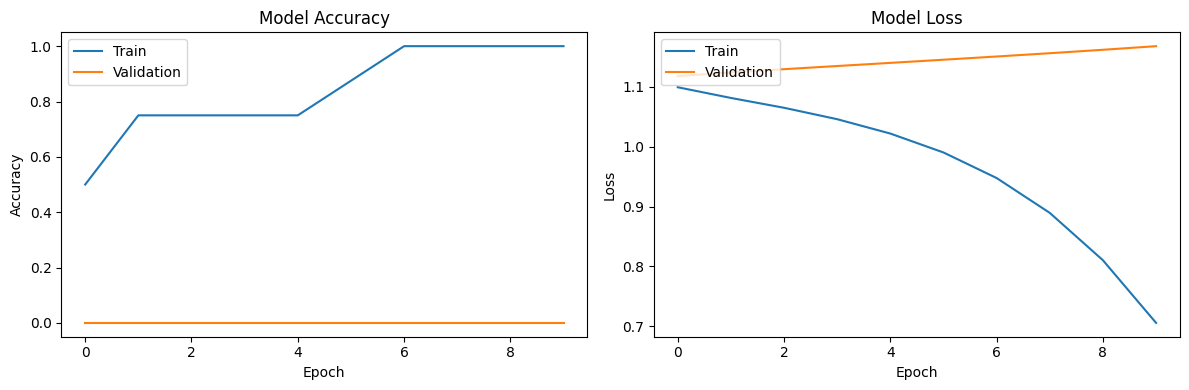

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Other Metrics that can be used to visualize the performance of the model

- **Accuracy**: Gives an overall idea of model performance but may be misleading for imbalanced datasets.
- **Confusion Matrix**: Helps visualize the model's performance for each class.
- **Precision**: Indicates the proportion of positive identifications that were actually correct.
- **Recall**: Indicates the proportion of actual positives that were identified correctly.
- **F1-score**: The harmonic mean of precision and recall, providing a single score that balances both metrics.
- **ROC Curve and AUC**: Useful for binary classification, showing the model's ability to distinguish between classes at various thresholds.

# Let's Build a Real world Project to understand the concept of LSTMs better

# Stock Price Prediction using LSTM

## Problem Statement

In this project, you will develop a Long Short-Term Memory (LSTM) neural network model to predict stock prices. Given historical stock price data for a company, your task is to build an LSTM model that can forecast the closing price of the stock for the next day. The model will use the past 60 days of stock prices to predict the price on the 61st day.

## Dataset

We'll be using historical stock price data for Apple Inc. (AAPL) from Yahoo Finance. The dataset includes daily stock information such as opening price, closing price, high, low, volume, and adjusted close.

### How to Download the Dataset

We'll use the historical stock price data for Apple Inc. (AAPL) from Yahoo Finance.

You can manually download the dataset from this link to visualize it:
https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1420070400&period2=1631577600&interval=1d&events=history&includeAdjustedClose=true

Save this CSV file as "AAPL_stock_data.csv" in your working directory.

---

**In this walkthrough notebook,** the dataset will be automatically downloaded using the `yfinance` library when you run the provided code. Here's how it works:

1. The code defines a function `download_stock_data()` that uses `yfinance` to fetch the data.
2. It downloads approximately 4 years of historical data (1500 days) up to the current date.
3. The data is then saved as a CSV file named "AAPL_stock_data.csv" in your working directory.

In [13]:
import os
import yfinance as yf
from datetime import datetime, timedelta

# Create a directory for storing the dataset if it does not exist
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Automatic dataset download and save
def download_stock_data(symbol, start_date, end_date, filename):
    stock = yf.Ticker(symbol)
    data = stock.history(start=start_date, end=end_date)
    data.to_csv(filename)
    print(f"Dataset downloaded and saved as {filename}")

# Set the parameters for data download
symbol = "AAPL"
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=1500)).strftime('%Y-%m-%d')
filename = os.path.join(data_dir, 'AAPL_stock_data.csv')

# Download and save the dataset
download_stock_data(symbol, start_date, end_date, filename)

Dataset downloaded and saved as data/AAPL_stock_data.csv


* We import the yfinance library and datetime for date handling.

* The download_stock_data() function takes four parameters:
    1. symbol: The stock symbol (e.g., "AAPL" for Apple)
    2. start_date: The start date for the historical data
    3. end_date: The end date for the historical data
    4. filename: The name of the file to save the data

* We set the parameters for data download:
    1. end_date is set to the current date
    2. start_date is set to 1500 days before the current date (about 4 years of data)
    3. filename is set to "AAPL_stock_data.csv"

* We call the download_stock_data() function to download and save the dataset before proceeding with the rest of the code.

In [14]:
# Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from datetime import datetime, timedelta

## Step 1: Data Preprocessing

- Load the downloaded CSV file into a pandas DataFrame.
- Convert the 'Date' column to datetime and sort the data chronologically.
- Select the 'Close' price for our prediction task.
- Normalize the data using MinMaxScaler to scale values between 0 and 1.
- Create sequences of 60 days for input and 1 day for output.
- Split the data into training (80%) and testing (20%) sets.

In [15]:
# Load the dataset
df = pd.read_csv('data/AAPL_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.head()

<ipython-input-15-cc9e9a610700>:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-04 00:00:00-05:00,130.563173,130.651177,123.952873,126.544189,143301900,0.0,0.0
1,2021-01-05 00:00:00-05:00,126.035732,128.822625,125.585912,128.108780,97664900,0.0,0.0
2,2021-01-06 00:00:00-05:00,124.891633,128.147891,123.581303,123.796432,155088000,0.0,0.0
3,2021-01-07 00:00:00-05:00,125.517476,128.715066,125.028548,128.020782,109578200,0.0,0.0
4,2021-01-08 00:00:00-05:00,129.497338,129.692921,127.346060,129.125763,105158200,0.0,0.0


In [16]:
# Select the 'Close' price for our prediction task
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [17]:
# Create sequences of 60 days for input and 1 day for output
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(data_normalized, seq_length)

In [18]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Step 2: Building the LSTM Model

- Create a Sequential model using TensorFlow/Keras.
- Add two LSTM layers with 50 units each and ReLU activation.
- Add a Dense layer for the output.
- Compile the model using Adam optimizer and Mean Squared Error loss.

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Step 3: Training the Model

- Fit the model on the training data.
- Use 50 epochs and a batch size of 32.
- Set aside 10% of the training data for validation.

In [20]:
# Training the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - loss: 0.0894 - val_loss: 0.0419
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0100 - val_loss: 0.0016
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022 - val_loss: 8.9144e-04
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0023 - val_loss: 9.3361e-04
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0018 - val_loss: 8.0741e-04
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014 - val_loss: 8.5077e-04
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms

## Step 4: Making Predictions

- Use the trained model to make predictions on the test set.
- Inverse transform the predictions and actual values to get real stock prices.

In [21]:
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step


## Step 5: Evaluating Model Performance

- Calculate the Root Mean Squared Error (RMSE) between predicted and actual prices.
- Plot the actual vs. predicted stock prices over time.

In [22]:
# Evaluating Model Performance

mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 5.831963900306638


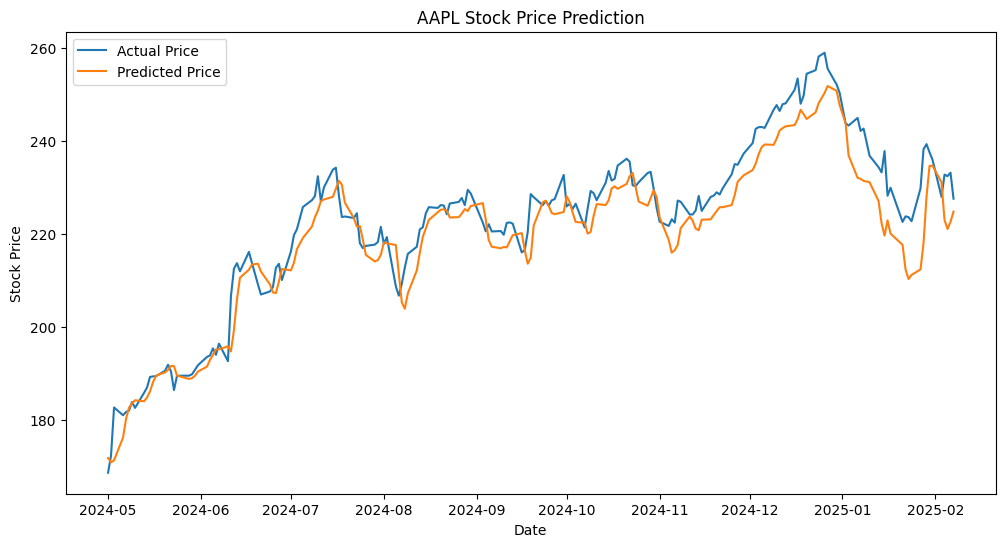

In [23]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].values[-len(y_test):], y_test, label='Actual Price')
plt.plot(df['Date'].values[-len(y_pred):], y_pred, label='Predicted Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Overview of the results

The graph shows the performance of an LSTM (Long Short-Term Memory) model in predicting Apple Inc. (AAPL) stock prices over a period from December 2023 to October 2024. The blue line represents the actual stock price, while the orange line shows the model's predictions.

## Key Observations


1. **Overall Trend Capture**: The LSTM model successfully captures the general trend of AAPL stock prices. It follows both upward and downward movements in the stock price over time.

2. **Lag in Predictions**: There's a noticeable lag in the predicted prices compared to actual prices. The orange line (predictions) often trails slightly behind the blue line (actual prices), especially during sharp price changes.

3. **Accuracy in Stable Periods**: The model performs well during periods of relative price stability, closely matching the actual price movements.

4. **Difficulty with Sudden Changes**: The LSTM struggles to predict sudden, sharp price movements accurately. This is evident in areas where there are quick spikes or drops in the actual price.

5. **Long-term Trend Alignment**: Despite short-term discrepancies, the model aligns well with long-term price trends, indicating good capture of underlying patterns.

6. **Price Range**: The model accurately predicts the general price range, with predictions mostly falling within the same range as actual prices (approximately $165 to $235).

## Strengths of the Model

- Good at capturing overall market trends
- Accurate in predicting the general price range
- Performs well during periods of stable or gradual price changes

## Limitations of the Model

- Struggles with sudden, sharp price movements
- Exhibits a lag in responding to price changes
- May underestimate extreme highs and lows